In [1]:
import pandas as pd
df = pd.read_csv('pima-indians-diabetes.data.csv',index_col=0)
df.head()

,plas,pres,skin,test,mass,pedi,age,class
preg,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.describe()

,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
df.isnull().sum()

plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [5]:
import matplotlib.pyplot as plt 
df.hist(figsize=(10,8)) 
plt.show()

<Figure size 1000x800 with 9 Axes>

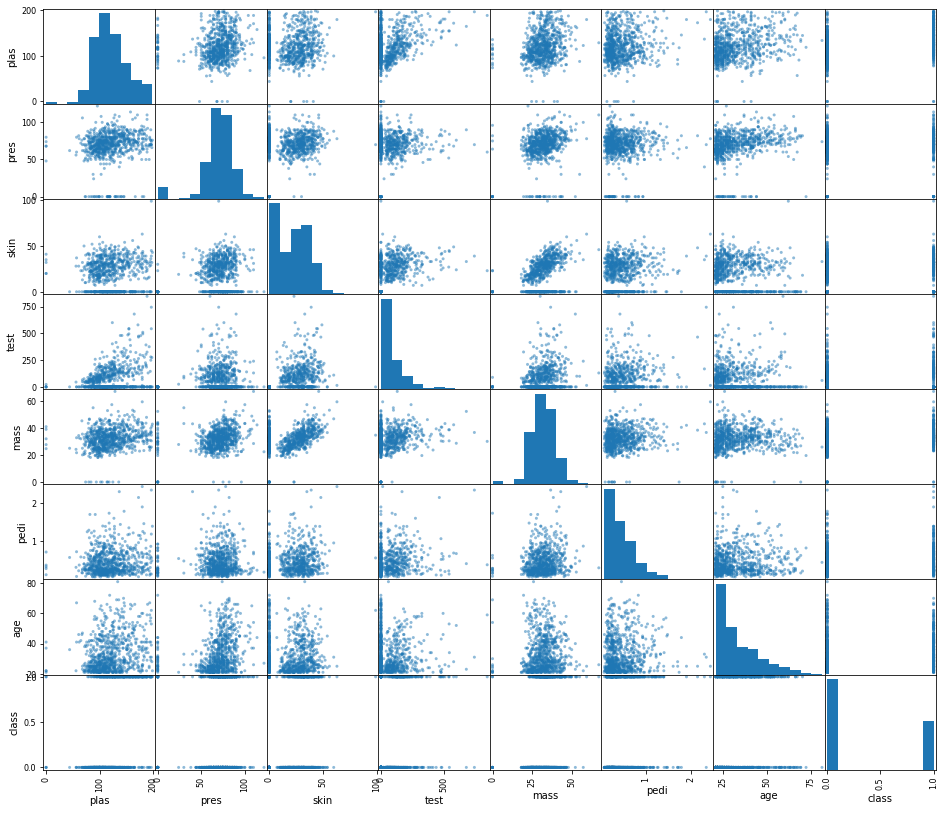

In [6]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df,figsize=(16,14)) 
plt.show()

In [7]:
# 划分自变量和因变量
X = df.loc[:,df.columns!='class']
y = df.loc[:,df.columns=='class']
# 划分训练集和测试集
from sklearn.model_selection import train_test_split 
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y) 
X_tr.shape,X_ts.shape

((576, 7), (192, 7))

In [9]:
!pip3 install xgboost

     |████████████████████████████████| 686kB 62kB/s eta 0:00:011
  Running setup.py install for xgboost ... done
You should consider upgrading via the 'pip install --upgrade pip' command.


In [16]:
#建立xgboost模型
from xgboost import XGBClassifier
model = XGBClassifier()
model = model.fit(X_tr,y_tr.values.ravel())

In [17]:
y_pred = model.predict(X_ts)
from sklearn.metrics import f1_score,accuracy_score
print('f1-score:%.4f'%f1_score(y_ts,y_pred)) 
print('accuracy:%.4f'%accuracy_score(y_ts,y_pred))

f1-score:0.6250
accuracy:0.7500


In [19]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
scores = cross_val_score(model,X,y.values.ravel(),cv=5,scoring='f1') 
scores.mean()

0.6381299961409118

In [23]:
from sklearn.model_selection import GridSearchCV 
import numpy as np
params = {'min_child_weight': list(range(6,15,2)),
    'max_depth': list(range(3,8,1)),
    'n_estimators':list(range(40,81,10))}
gs = GridSearchCV(XGBClassifier(learning_rate=0.03),
param_grid = params, scoring='f1',
cv=4,
n_jobs=-1, return_train_score=True, verbose=1)
gs.fit(X_tr, y_tr.values.ravel()) 
gs.best_params_, gs.best_score_

Fitting 4 folds for each of 125 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.6s finished


({'max_depth': 3, 'min_child_weight': 6, 'n_estimators': 80},
 0.6417723043670824)

In [26]:
clf = gs.best_estimator_
clf.fit(X_tr,y_tr.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.03, max_delta_step=0, max_depth=3,
              min_child_weight=6, missing=None, n_estimators=80, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [27]:
scores = cross_val_score(clf,X,y.values.ravel(),cv=5,scoring='f1') 
scores.mean()

0.6180103519668737